# <span style='font-family:Inter'> Ergodicity


In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\luca\\PycharmProjects\\Warehouse')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Viz.charting import generate_ax

## <span style='font-family:Inter'> Set up

$$r_1 = 1.5 \text{ with } p_1 = 0.5\\
r_2 = 0.6 \text{ with } p_2 = 0.5$$

In [3]:
n = 1000
p = 1/2
q = 1 - p
r_pos = 1.5
r_neg = 0.6

ensamble_factor = r_pos * p + r_neg * q       # additive
time_factor = r_pos  **p * r_neg ** q         # multiplicative 

print('Ensamble Average Multiplication factor:', ensamble_factor)
print('Time Average Multiplication factor:', time_factor)

Ensamble Average Multiplication factor: 1.05
Time Average Multiplication factor: 0.9486832980505138


## <span style='font-family:Inter'> Ensemble Average

$$\langle r \rangle = r_1 \cdot p_1 + r_2 \cdot p_2 = \frac{1}{2} \cdot 1.5 + \frac{1}{2} \cdot 0.6 = 1.05$$

So, the continuous growth rate is:

$$ \ln \langle r \rangle \approx 4.9 \%$$

In [3]:
## simulate pag 13

## <span style='font-family:Inter'> Time Average

$$\bar r = r_1^{p_1} \cdot r_2^{p_2} = 1.5^{\frac{1}{2}} \cdot 0.6^{\frac{1}{2}} \approx 0.95$$

So, the continuous growth rate is:

$$ \ln \bar r \approx -5.3 \%$$

In [4]:
n = 10000
r_pos = 1.5
r_neg = 0.6
decay = ((r_pos)*(r_neg))**(1/2) # decay factor
print('Multiplication factor:', decay)

Multiplication factor: 0.9486832980505138


In [5]:
w_paths_dict = {}
for j in range(0, 100):
    w = 1
    decay_w = 1
    w_dict = {}
    decay_dict = {}

    w_dict[0] = w
    decay_dict[0] = decay_w

    realiz = np.random.choice([r_pos, r_neg], [n])

    for cnt, i in enumerate(realiz):
        w = w * i
        w_dict[cnt + 1] = w
        decay_w = decay_w * decay
        decay_dict[cnt + 1] = decay_w

    w_paths_dict[j] = pd.Series(w_dict)

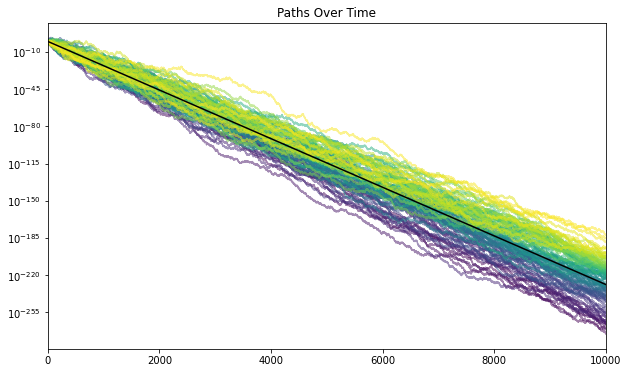

In [6]:
w_paths = pd.DataFrame(w_paths_dict)

w_paths = w_paths.sort_values(by=w_paths.index[-1], axis=1)  # sort the paths
w_paths.plot(logy=True, figsize=(10, 6), cmap='viridis', legend=False, alpha=0.5)
pd.Series(decay_dict).plot(logy=True, color='black', title='Paths Over Time')
plt.show()

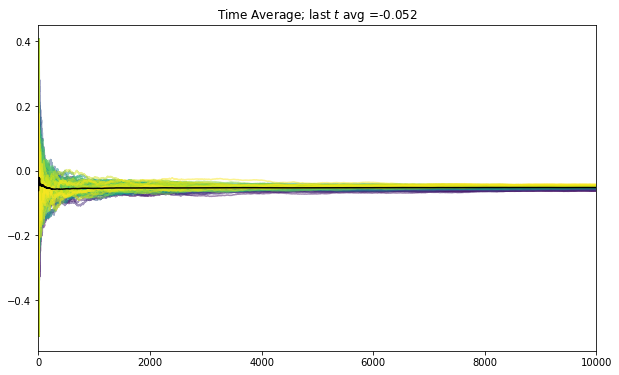

In [7]:
log_growth_avg = (np.log(w_paths) - np.log(w_paths).shift()).expanding().mean()
log_growth_avg_mean = log_growth_avg.mean(axis=1)
last_v = str(round(log_growth_avg_mean.values[-1], 3))

log_growth_avg.plot(legend=False, cmap='viridis', figsize=(10, 6), alpha=0.5)
log_growth_avg.mean(axis=1).plot(legend=False, color='black', title='Time Average; last $t$ avg =' + last_v)
plt.show()

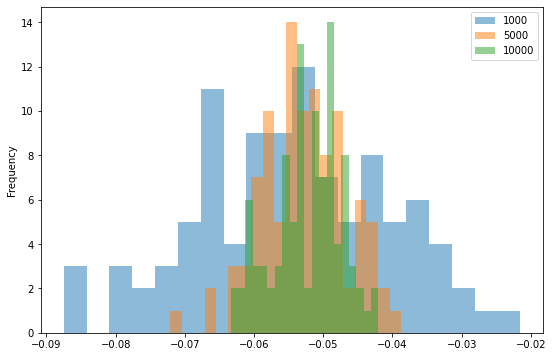

In [8]:
log_growth_avg.iloc[1000, :].plot(kind='hist', alpha=0.5, bins=20, figsize=(9, 6), legend='1000')
log_growth_avg.iloc[5000, :].plot(kind='hist', alpha=0.5, bins=20, legend='5000')
log_growth_avg.iloc[10000, :].plot(kind='hist', alpha=0.5, bins=20, legend='10000')
plt.show()

In [9]:
# todo distrituion of growth (Normal, pag. 24)
# todo heatmap

It can be shown that the time-average growth rate of a single trajectory is the same as that of a finite-ensemble average of trajectories, 

$$\lim_{t \to \infty} \frac{\Delta \ln x}{\Delta t} =  \lim_{t \to \infty} \frac{\Delta \ln \langle x \rangle_N}{\Delta t}$$



----

### <span style='font-family:Inter'> Multiplicative growth rate

An observable that neatly summarises the two different aspects of multiplicative growth we have illustrated is the **multiplicative (exponential) growth rate**, observed over finite time $t$, in a finite ensemble of $N$ realisations

$$g_m(\langle x(t) \rangle _N , \Delta t) =\frac{\Delta \ln \langle x \rangle_N}{\Delta t}$$

The relevant scalars arise as two different limits of the same stochastic object. Let's define the multiplicative growth rate formula.

In [10]:
def mul_exp_growth_rate(r_pos, r_neg, T, N, do_print=True):
    
    # starting wealth is one

    realizations = pd.DataFrame(np.random.choice([r_pos, r_neg], [T, N]))
    wealth_evolution = realizations.cumprod()
    exp_growth = np.log(wealth_evolution.iloc[-1, :].mean()) / T
    
    if do_print:
        print('Exponential growth with N = %s and t = %s: ' % (str(N), str(T)), round(exp_growth * 100, 2), '%')
    
    return exp_growth

The exponential growth rate of the expectation value (that’s also $\frac{1}{\delta t} ln \langle r \rangle$, ie +4.7%) is

$$g_{\langle \rangle} = \lim_{N \to \infty} g_m$$

In [11]:
mul_exp_growth_high_N = mul_exp_growth_rate(r_pos=1.5, r_neg=0.6, N=10000, T=3)

Exponential growth with N = 10000 and t = 3:  5.01 %


In [12]:
growth_l = []
for i in range(1000):
    growth_l.append(mul_exp_growth_rate(r_pos=1.5, r_neg=0.6, N=1000, T=3, do_print=False))

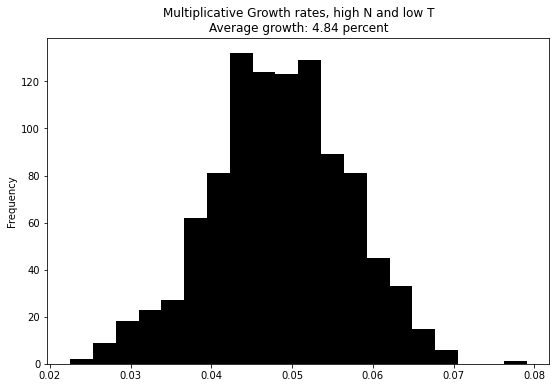

In [13]:
fig_title = 'Multiplicative Growth rates, high N and low T\nAverage growth: %s percent'  % \
round(pd.Series(growth_l).mean() * 100, 2)
pd.Series(growth_l).plot(kind='hist', bins=20, color='black', figsize=(9, 6), title=fig_title)
plt.show()

and the exponential growth rate followed by every trajectory when observed for a long time (that’s also  $\frac{1}{\delta t} \ln \bar{r}$, ie -5.1%)

$$g_{\langle \rangle} = \lim_{t \to \infty} g_m$$

In [14]:
mul_exp_growth_high_N = mul_exp_growth_rate(r_pos=1.5, r_neg=0.6, N=2, T=1000)

Exponential growth with N = 2 and t = 1000:  -5.98 %


In [15]:
growth_l = []
for i in range(1000):
    growth_l.append(mul_exp_growth_rate(r_pos=1.5, r_neg=0.6, N=1, T=1000, do_print=False))

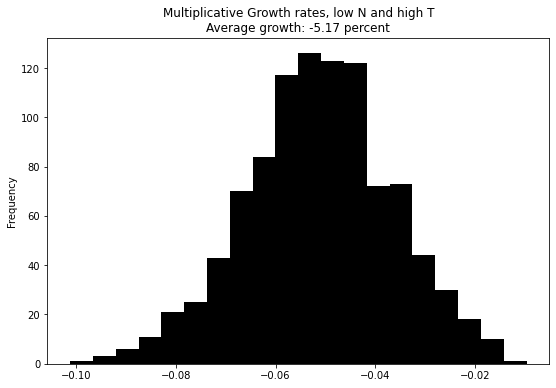

In [16]:
fig_title = 'Multiplicative Growth rates, low N and high T\nAverage growth: %s percent'  % \
round(pd.Series(growth_l).mean() * 100, 2)

pd.Series(growth_l).plot(kind='hist', bins=20, color='black', figsize=(9, 6), title=fig_title)
plt.show()

## <span style='font-family:Inter'> Ergodic Property

<div class="alert alert-info">
In these notes, an observable $A$ is called ergodic if its expectation value is constant in time and its time average converges to this value with probability one

$${\displaystyle  \lim_{t \to \infty}{\frac {1}{\Delta t}}\int _{0}^{t + \Delta t} A(s)ds = \lim_{N \to \infty}{\frac {1}{N}} \sum_i^N A_i(t)}$$</div>

In this game, what happens to $x$ over time, i.e. the rate of change of wealth $\frac{\delta x (t)}{\delta t}$ is a different random variable for each $t$ because it is proportional to $x(t)$. We want something more stable, and so wqe can find the two **Ergodic Observables**: 

- the multiplicative factor $r(t)$ is **an ergodic observable** that reflects **what happens to the expectation value of $x$**, 
- per-round changes in the logarithm of wealth, $\delta \ln x = \ln r$, are also **ergodic** and reflect **what happens to $x$ over time**.

For multiplicative dynamics, i.e. if $\frac{x( t + \delta t)}{x(t)}$ is stationary, the expectation value of the rate of change of the logarithm of $x(t)$ determines whether the game is long-term profitable for an individual (*ie if the time average of wealth grows or not*).

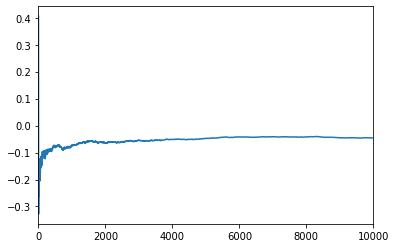

In [17]:
(np.log(pd.Series(w_dict))- np.log(pd.Series(w_dict).shift())).expanding().mean().plot()
plt.show()

## <span style='font-family:Inter'> Brownian Motion (BM) & Gemetric BM
    
- For Brownian Motion, time average does not converge exist
- For GBM, ensemble average is $\mu$ while time average is $\mu - \frac{1}{2} \sigma^2$

In [ ]:
t = 10000
realizations = np.random.normal(0, 1, t)
v = pd.Series(realizations).cumsum()
v.expanding().mean().plot()
plt.show()
print(np.sqrt(t/3))

In [20]:
t = 1000
realizations = np.random.normal(0, 1, [t, 100])
v = pd.DataFrame(realizations).cumsum()
print('time avg std: ', v.iloc[-1, :].std(), ', time avg theoretical std: ', np.sqrt(t/3))

time avg std:  30.985732036153088 , time avg theoretical std:  18.257418583505537


## <span style='font-family:Inter'> Decision Theory
    
For additive and multiplicative dynamics we have that:

$$\bar{g}_a = \lim_{\Delta t \to \infty}  = \left\{ \frac{\Delta x(t)}{\Delta t} \right\} = E \bigg( \frac{\Delta x(t)}{\Delta t} \bigg)\\
\bar{g}_m = \lim_{\Delta t \to \infty}  = \left\{ \frac{\Delta \ln x(t)}{\Delta t} \right\} = E \bigg( \frac{\Delta \ln x(t)}{\Delta t} \bigg)$$

Both are ergodic, i.e. time average = growth average.

<div class="alert alert-info">
    <strong>DECISION AXIOM</strong>: Choose the gamble with the largest time-average
</div>

## <span style='font-family:Inter'> St. Petersbourg Paradox </span>

Problem setup:

$$q_j = \$ 2^{j-1} - F, \space\space\space  p_j=2^{-j} $$

The rate of change of expected wealth is:

$$
\begin{align}
\frac{E(\delta x)}{\delta t} &= \frac{1}{\delta t} \sum_{j=1}^{\infty}p_j q_j \\
& = \frac{1}{\delta t} \bigg( \$ \sum_{j=1}^{\infty}2^{-j} 2^{j-1} - \sum_{j=1}^{\infty} 2^{-j} F \bigg) \\
& = \frac{1}{\delta t} \bigg( \$ \sum_{j=1}^{\infty} \frac{1}{2} -  F \bigg)
\end{align}
$$

Which clearly diverges. The expected value is then totally unfit to evaluate this kind of gamble. The proposed solution was to use logarithmic utility. 


$$
\begin{align}
\frac{E(\delta \ln x)}{\delta t} &= \frac{1}{\delta t} \sum_{j=1}^{\infty}p_j  [\ln(x + q_j) - \ln(x)] \\
& = \frac{1}{\delta t} \sum_{j=1}^{\infty}2^{-j} \ln \bigg( \frac{x + \$ 2^{j-1} - F}{x} \bigg) \\
\end{align}
$$

Where $x$ is the buyers wealth 
    
todoooooooooo peters solution

In [7]:
def st_petersbourg(x_0=100, F=10, pth='additive', n_pth=1000):

    """
    x_0 initial wealth
    F ticket price
    path additivie or multiplicative
    
    """

    x = x_0    
    x_evolution = []
    realizations = np.random.geometric(0.5, n_pth)
    
    if pth == 'additive':
        for i in realizations:
            x = x + 2**i - F
            x_evolution.append(x)
    
    elif pth == 'multiplicative':
        for i in realizations:
            r = (100 + 2**i - F)/100  # define the ergodic coefficient r_j
            x = x * r
            x_evolution.append(x)
            
    return pd.Series(x_evolution)

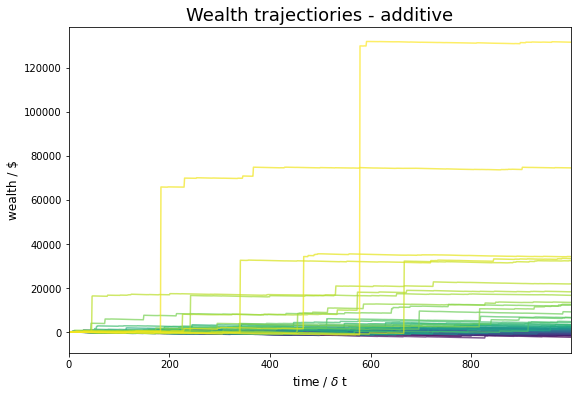

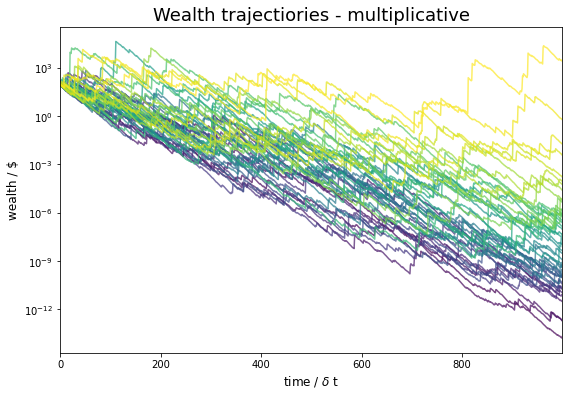

In [12]:

path_kinds = {'additive': 
              {'log_plot': False}, 
              'multiplicative':
              {'log_plot': True}}

for path_kind in path_kinds.keys():
    paths = []
    for _ in range(50):
        path = st_petersbourg(pth=path_kind, F=10)
        paths.append(path)
    
    df = pd.DataFrame(paths).T
    df = df.sort_values(df.index[-1], axis=1)
    ax = generate_ax('Wealth trajectiories - %s' % path_kind, 'time / $\delta$ t', 'wealth / \$')
    df.plot(ax=ax, legend=False, cmap='viridis', alpha=0.7, logy=path_kinds[path_kind]['log_plot'])
    plt.show()

## <span style='font-family:Inter'> Insurance Paradox
    
1. To be viable, an insurer must charge an insurance premium of at least the expectation value of any claims that may be made against it, called the “net premium”.
2. The insurance buyer therefore has to be willing to pay more than the net premium so that an insurance contract may be successfully signed.
3. Under the expected-wealth paradigm it is irrational to pay more than the net premium, and therefore insurance contracts should not exist.

Using the time average (under multiplicative repetition) instead of the expected value makes the puzzle disappear. Maximizing time-growth gives the insurer and the insured an extra wealth growth rate, so both will be willing to sign the insurance contract (see the example in the book).

## <span style='font-family:Inter'> Populations
    ...

## <span style='font-family:Inter'> Markets

Let's define a model:

$$\begin{equation} dx_{\ell} = x_{\ell} (\mu^m_{\text{riskless}} + \ell \mu^m_{\text{excess}}) + \ell^m \sigma^m dW) \tag{1} \end{equation}$$

The two averages are:

$$\widehat{g_l^m} = \mu_{\text{riskless}}^m + \ell^m \mu_{\text{excess}}^m $$

$$\overline{g_l^m} = \mu_{\text{riskless}}^m + \ell^m \mu_{\text{excess}}^m - \frac{(\ell^m\sigma^m)^2}{2} $$


The optimal leverage $\ell_{\text{opt}}$ is defined as: 

$$\ell_{\text{opt}} = \frac{\mu_{\text{excess}}}{\sigma_s^2}$$

where $\mu_e = \mu_s - \mu_r$ is the excess return over the risk free and $\sigma_s^2$ is the variance of the risky asset.

This implies that, unless $\ell^m_{opt} = 1$ it is possible to choose the leveragel such that $x_\ell(t)$ consistently outperforms x(t).

The Sharpe ratio, apart from being **insensitive to leverage**, is not dimensionless, meaning that the time span over which it is computed influences the level of the metric. For example, given a yearly return of 50% and a yearly standard deviation of
10% the sharpe ratio will be 5. On the other side, the daily sharpe ratio will be:
		
$$\frac{\frac{50\%}{365}}{\frac{10\%}{365^{0.5}}}=0.26$$

On the other side, the optimal leverage is dimensionless and gives an objective measure of the "quality" of the portfolio. The assumption is that the risky asset follows a GBM. **Relaxing the model**, we carry on some thought experiment. Weask the following question:

> This suggests a different, fluctuations-based notion of market efficiency, which we call **stochastic market efficiency**: it is impossible for a market participant without privileged information to beat a stochastically efficient market simply by choosing the amount he invests in stock, i.e. by choosing his leverage. Therefore, we make the following hypothesis: real markets self-organise such that $$\ell_{\text{opt}} = 1$$


- $\ell_{\text{opt}} < 0$: paralyzed economy / depression
- $\ell^{\text{est}}_{\text{opt}} < \ell_{\text{opt}}$ due to transaction costs, short selling costs, etc.


#### <span style='font-family:Inter'> Puzzles Solved
    
- Noise: setting $\ell_{\text{opt}} = 1$, then $(\sigma_s)^2 = \mu_e$. Price fluctuations are necessary for stability.
- Equity Premium


The **Stochastic Market Efficiency** claims that it is impossible for a market participant without privileged information to beat the market by choosing the amount he invests in an asset or portfolio of assets, i.e. by choosing his leverage. Simple strategies such as borrowing money to invest, $\ell_{\text{opt}} > 1$, or keeping some money in the bank, $\ell_{\text{opt}} < 1$, should not yield consistent market outperformance (no leverage-arbitrage").

Ordinary effciency is essentially a static concept, as it states that prices coincide with some form of value. Stochastic effciency, on the other hand, constrains price dynamics and predicts properties of fluctuations.


In [3]:
from Finance.Portfolio.stocks import Stock

ModuleNotFoundError: No module named 'yfinance'